# Signal massplanes

**Goal:** In my [10th Dec 2020](https://indico.cern.ch/event/984080/contributions/4147811/attachments/2160496/3645734/HHartman_4b_10_Dec_2020.pdf) talk, I showed this plot of VR contamination in the SR, and TJ asked me if I could look at *where* these signal events in the VR region were coming from.

For the resonant BDT pairing, the signal events in the VR were in the upper right of the image.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os

os.sys.path.append('../GraphNN/')
from preprocess import process4bs, mcToYr

os.sys.path.append('../code')
from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2
from eventDisplays import rainbow_text, truthDisplay
from analysis import fileDir

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


In [2]:
physicsSample = 'SMNR'
mc='mc16a'
prodTag = 'APR2020'

subDir = f'{physicsSample}_{mc}_PFlow-{prodTag}'

In [11]:
df_dhh = pd.read_hdf(f'../data/{subDir}/df_MDR_3b_Qb_sort.h5', key='df')
df_dr1 = pd.read_hdf(f'../data/{subDir}/df_min_dR1_3b_Qb_sort.h5',key='df')

Cool, cool! First let's do this broken down by cut for all of the cateogies (I guess)

In [10]:
os.sys.path.append('../eda_tools')
from plot_helper import massplane

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


SR center: (120.0,110.0) GeV
SR center: (120.0,110.0) GeV
SR center: (120.0,110.0) GeV
SR center: (120.0,110.0) GeV
SR center: (120.0,110.0) GeV
SR center: (120.0,110.0) GeV


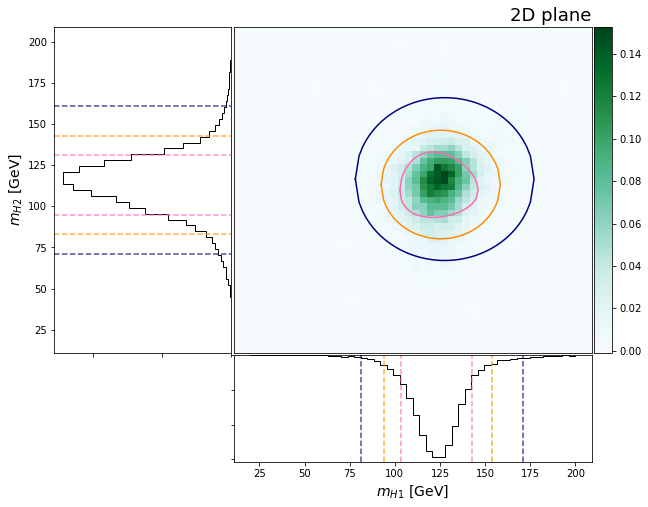

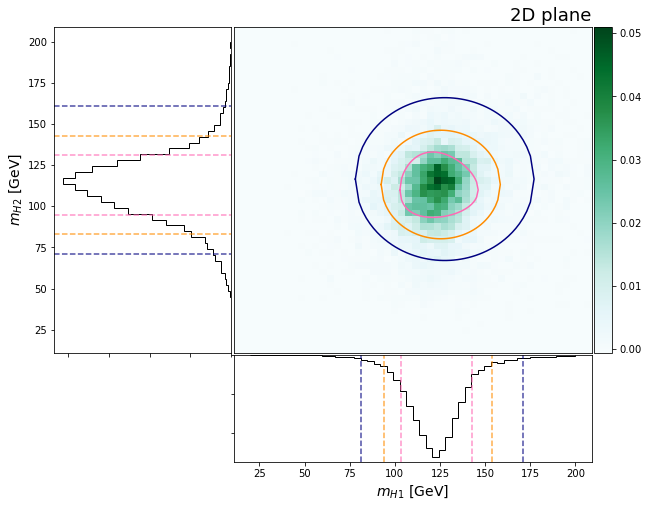

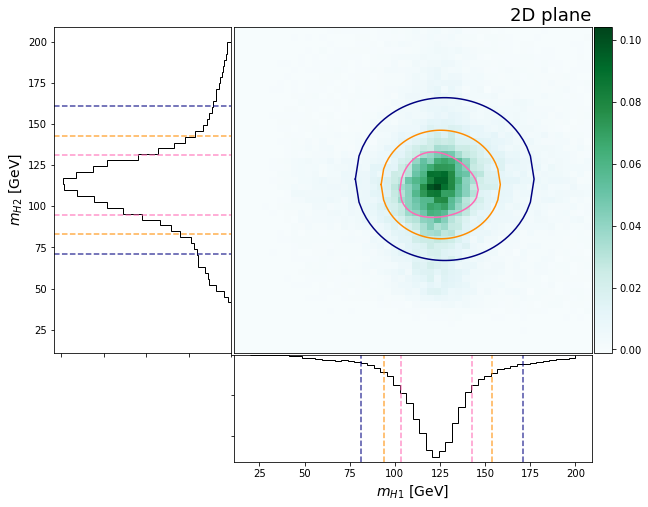

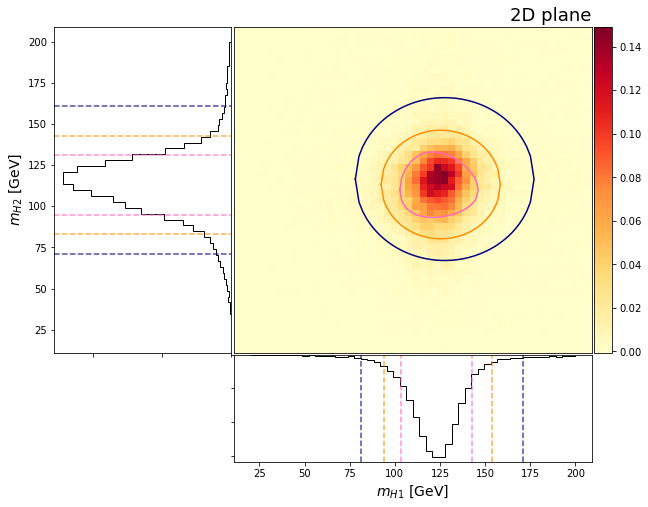

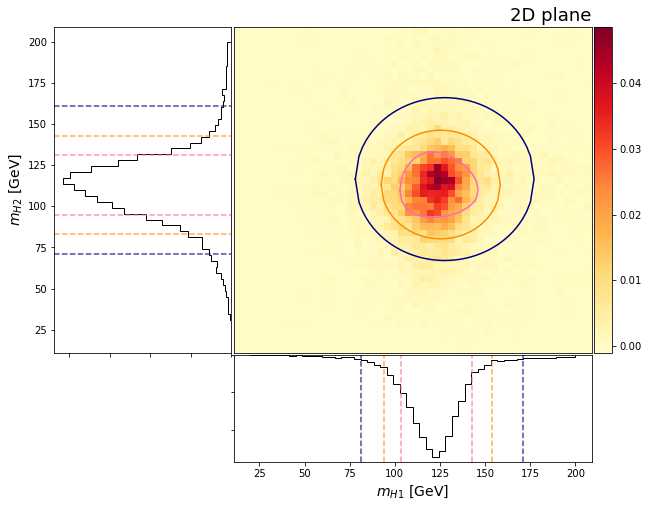

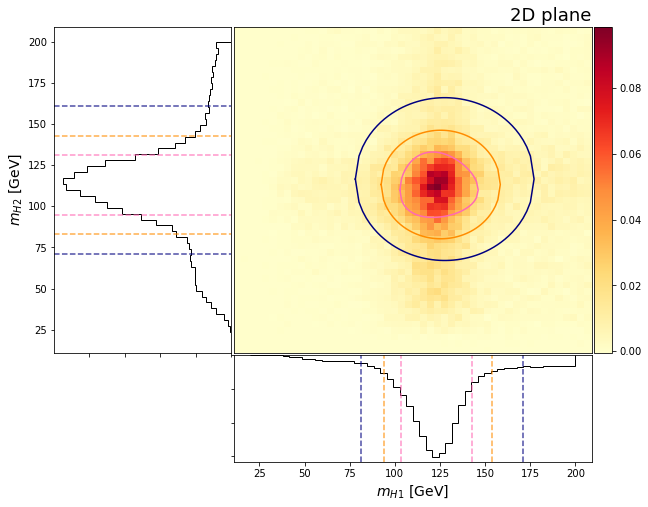

In [12]:
for df,cmap in zip([df_dhh, df_dr1],['BuGn','YlOrRd']):

    m = (df.nValidPairs >= 1) & (df.cut_deta_hh) & (df.cut_Xwt)

    for btag in [df.j3_Db >=3,df.j3_Db ==2,df.j3_Db==1]:
        
        massplane(df[m&btag],cmap=cmap,#title=r'semileptonic $t\bar{t}$ 2b: after pairing',
                  bins=[50,50],weights=df.loc[m&btag,'mc_sf'],save=False)#,
                  #filename=f'figures/semilep_ttbar_mc16a_PFlow-MAR2020-5jets/SM_2b/massplane_2b_afterPairing.pdf')
        

        